In [11]:
import json

import sys
sys.path.append('/home/jhsia2/ragged')
from file_utils import load_jsonl, save_json


In [18]:
import re


def get_question_categories(data):
    # questions = ["How many apples are there?", "Who is the president?", "When was the Eiffel Tower built?", "How does a computer work?"]

    # Patterns for different question types
    who_pattern = r"(^\s*who\b)|(\bby who\?\s*$)"
    what_pattern = r"^\s*(what\b|which\b|list\b)"
    when_pattern = r"(^\s*in what year\b)|(^\s*when\b)|(\byear\?\s*$)|(\byears\?\s*$)"
    # where_pattern = r"(^\s*in what country\b)|(^\s*in which country\b)|(^\s*in what city\b)|(^\s*in which city\b)|(^\s*where\b)|(\bin what country\?\s*$)|(\bin which country\?\s*$)|(\bin what city\?\s*$)|(\bin which city\?\s*$)"
    where_pattern = r"(^\s*in what country\b)|(^\s*in which country\b)|(^\s*in what city\b)|(^\s*in which city\b)|(^\s*where\b)|(\bcountry\?\s*$)|(\bcity\?\s*$)|(\blocated\?\s*$)"
    why_pattern = r"^\s*why\b"
    # how_process_pattern = r"^\s*how\b(?! many\b| much\b| often\b| long\b| far\b)"
    numerical_pattern = r"^\s*(how many\b|how much\b|how often\b|how long\b|how far\b|one\b|two\b|three\b)"
    yes_no_pattern = r"^\s*(is|did|does|do|are)\b"


    # Dictionary to store categorized questions
    categorized_questions = {
        "Who": [],
        "What": [],
        "When": [],
        "Where": [],
        "Why": [],
        "Yes/No": [],
        "Numerical": [], 
        "Other": []
    }

    questions_categorized = {}

    # Categorizing questions
    for d in data:
        index = d['id']
        # if index == '5ab56f7a554299637185c59a':
        #     print(d)
    
        question = d['input']
        if re.search(who_pattern, question, re.IGNORECASE):
            categorized_questions["Who"].append((index, question))
            questions_categorized[index] = 'Who'
        elif re.search(what_pattern, question, re.IGNORECASE):
            categorized_questions["What"].append((index, question))
            questions_categorized[index] = 'What'
        elif re.search(when_pattern, question, re.IGNORECASE):
            categorized_questions["When"].append((index, question))
            questions_categorized[index] = 'When'
        elif re.search(where_pattern, question, re.IGNORECASE):
            categorized_questions["Where"].append((index, question))
            questions_categorized[index] = 'Where'
        elif re.search(why_pattern, question, re.IGNORECASE):
            categorized_questions["Why"].append((index, question))
            questions_categorized[index] = 'Why'
        elif re.search(yes_no_pattern, question, re.IGNORECASE):
            categorized_questions["Yes/No"].append((index, question))
            questions_categorized[index] = 'Yes/No'
        elif re.search(numerical_pattern, question, re.IGNORECASE):
            categorized_questions["Numerical"].append((index, question))
            questions_categorized[index] = 'Numerical'
        else:
            categorized_questions["Other"].append((index, question))
            questions_categorized[index] = 'Other'

    # Display the categorized questions
    for category, questions in categorized_questions.items():
        print(f"{category} Questions: {len(questions)}")
    return categorized_questions, questions_categorized


In [21]:
import matplotlib.pyplot as plt

def plot_question_distribution(categorized_questions):
# Count the number of questions in each category
    counts = {key: len(value) for key, value in categorized_questions.items()}

    # Categories and their counts
    categories = list(counts.keys())
    values = list(counts.values())

    # Plotting
    plt.bar(categories, values)
    plt.xlabel('Question Categories')
    plt.ylabel('Number of Questions')
    plt.title('Number of Questions per Category')
    plt.show()


In [25]:
data = load_jsonl('/data/user_data/jhsia2/dbqa/data/nq-dev-kilt.jsonl')
categorized_questions, questions_categorized = get_question_categories(data)
save_json(questions_categorized, '/data/tir/projects/tir6/general/jhsia2/data/nq_questions_categorized.json')

loading from /data/user_data/jhsia2/dbqa/data/nq-dev-kilt.jsonl
Who Questions: 1057
What Questions: 458
When Questions: 516
Where Questions: 335
Why Questions: 11
Yes/No Questions: 12
Numerical Questions: 114
Other Questions: 334
writing to /data/tir/projects/tir6/general/jhsia2/data/nq_questions_categorized.json


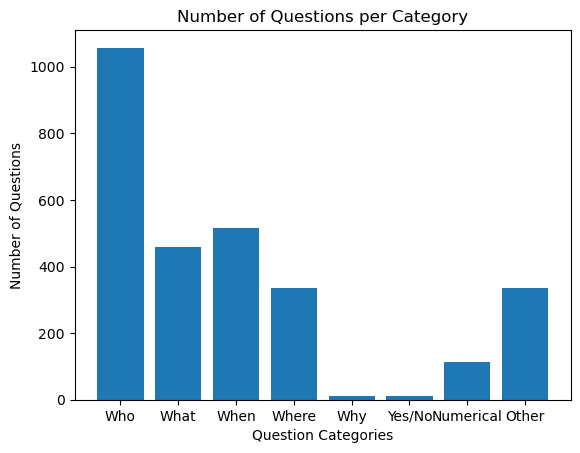

In [26]:
plot_question_distribution(categorized_questions)

In [27]:
data = load_jsonl('/data/user_data/jhsia2/dbqa/data/hotpotqa-dev-kilt.jsonl')
categorized_questions, questions_categorized = get_question_categories(data)
save_json(questions_categorized, '/data/tir/projects/tir6/general/jhsia2/data/hotpotqa_questions_categorized.json')

loading from /data/user_data/jhsia2/dbqa/data/hotpotqa-dev-kilt.jsonl
Who Questions: 521
What Questions: 2200
When Questions: 269
Where Questions: 273
Why Questions: 9
Yes/No Questions: 309
Numerical Questions: 99
Other Questions: 1920
writing to /data/tir/projects/tir6/general/jhsia2/data/hotpotqa_questions_categorized.json


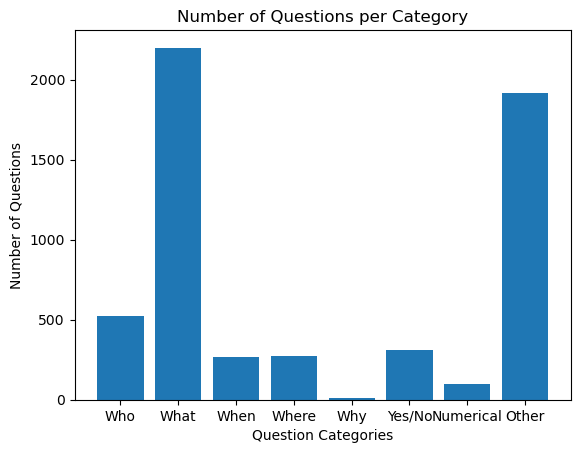

In [28]:
plot_question_distribution(categorized_questions)